# Gaussian Formula

$$
f(x)= a e^{-\left(\frac{(x-b)^2}{2c^2})\right)}
$$
where for our purposes, $b=0$

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## confirm Gauss Function

In [2]:
def gauss(x, a=1, b=0, c=1):
    expnt = -((x-b)**2)/(2*c**2)
    return a*np.exp(expnt)

In [27]:
from scipy.stats import norm

Need normalization factor of $\frac{1}{\sqrt{2\pi}}$

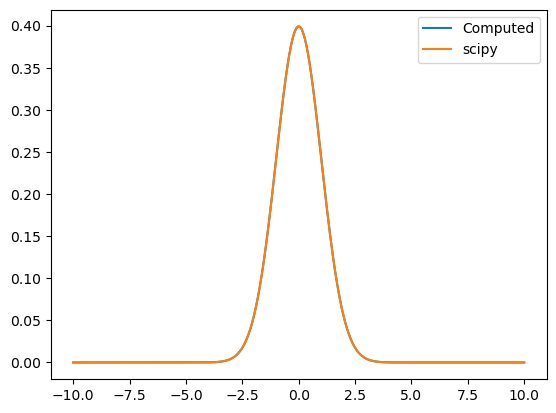

In [31]:
x = np.linspace(-10, 10, 1000)
y = gauss(x, a=np.sqrt(1/(2*np.pi)))
xnorm = norm.pdf(x)

fig, ax = plt.subplots()
ax.plot(x,y, label='Computed')
ax.plot(x, xnorm, label='scipy')
ax.legend()

In [32]:
np.allclose(y, xnorm)

True

gauss function appears to produce same result as `scipy.random.normal.pdf`

Text(0.5, 1.0, 'Width Parameter c')

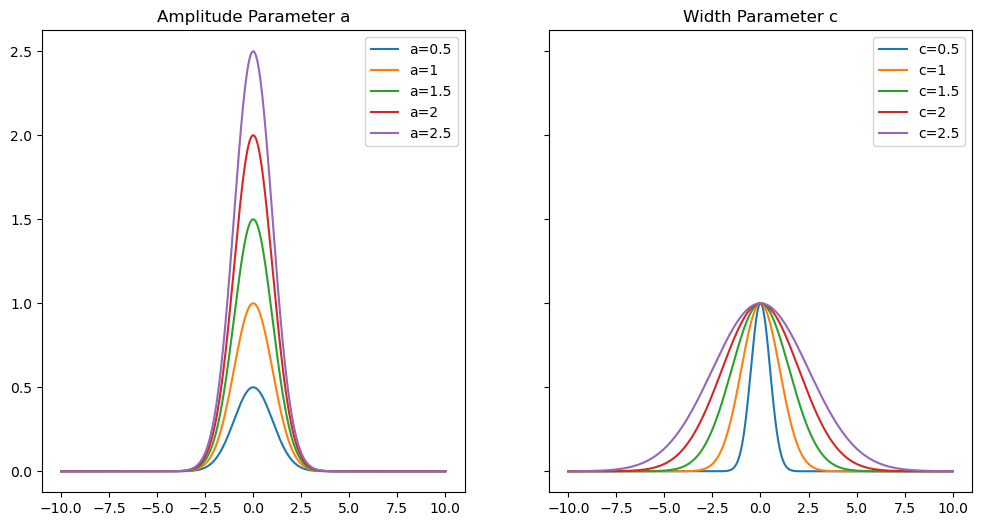

In [17]:
fig = plt.figure(figsize=(12,6))

axs = fig.subplots( 1,2, sharey=True)
ax = axs[0]
for a in [0.5, 1, 1.5, 2, 2.5]:
    ax.plot(x, gauss(x, a=a), label=f'a={a}')
ax.legend()
ax.set_title('Amplitude Parameter a')

ax =axs[1]
for c in [0.5, 1, 1.5, 2, 2.5]:
    ax.plot(x, gauss(x,c=c ), label=f'c={c}')
ax.legend()
ax.set_title('Width Parameter c')

## Full Width Half Maximum (FWHM)

$$ 
FWHM = 2\sqrt{2 ln 2}\ c \approx 2.35482\ c
$$
Formula above computes the width, we need the x-distance so half of that value.

(http://hyperphysics.phy-astr.gsu.edu/hbase/Math/gaufcn2.html)

Text(0.5, 1.0, 'Full Width, Half Maximum')

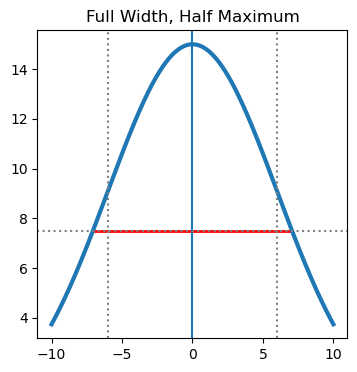

In [39]:
a=15
c= 6.0
#fwhm = 2.35482*c
fwhm = 1.18*c
mx = gauss(fwhm, a=a, c=c)

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)

ax.plot(x, gauss(x,a=a, c=c ), lw=3,label=f'c={c}')
ax.axvline(0)
ax.axhline(a*0.5, ls=':', color='grey')
ax.axvline(-c, ls=':', color='grey')
ax.axvline(c, ls=':', color='grey')
ax.hlines(y=mx, xmin=-fwhm, xmax=fwhm, lw=2, color='red')
ax.set_title('Full Width, Half Maximum')